<a href="https://colab.research.google.com/github/huimarco/f1-2021-titlefight/blob/main/h3_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [82]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uploaded = files.upload()

Saving h3Videos.csv to h3Videos.csv


In [254]:
h3 = pd.read_csv(io.BytesIO(uploaded['h3Videos.csv']))

# Data Wrangling

In [255]:
# remove first column
h3.drop(['Unnamed: 0'],axis=1,inplace=True)

# rename columns
h3.columns = ['id','published_datetime','name','description','duration','view_count','like_count','comment_count']

# convert datetime_published
h3['published_datetime'] = pd.to_datetime(h3['published_datetime'],format='%Y-%m-%dT%H:%M:%SZ')

# convert duration
h3['duration'] = pd.to_timedelta(h3['duration'])

# filter out shorts
h3 = h3[h3['duration'] > '00:20:00']

# filter out videos before 2020
h3 = h3[h3['published_datetime']>'2020']

# reset index
h3.reset_index(drop=True,inplace=True)

Notes:
- Silent Libary videos are under 'Off The Rails'
- Frenemies Vlogs are under 'Frenemies'
- Off the Rail videos published before the official 'Off The Rails #1' are under 'H3 Podcast' 

In [256]:
h3.describe()

,duration,view_count,like_count,comment_count
count,400,4.000000e+02,400.000000,400.00000
mean,0 days 02:21:05.375000,1.634259e+06,43606.707500,7630.83750
std,0 days 00:44:28.022534572,1.117592e+06,33082.478821,10600.38643
min,0 days 00:20:41,2.533790e+05,9373.000000,1180.00000
25%,0 days 01:50:20,9.916032e+05,25552.250000,3249.00000
50%,0 days 02:15:08,1.259144e+06,32032.000000,4559.00000
75%,0 days 02:57:28.250000,1.814354e+06,44540.250000,7470.00000
max,0 days 04:21:50,6.728079e+06,276547.000000,140706.00000


# Exploratory Data Analysis

### Top 5 videos by views, likes, and comments.

In [238]:
h3.nlargest(5,'view_count')

,id,published_datetime,name,description,duration,view_count,like_count,comment_count
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,0 days 02:33:23,6728079,176535,44133
278,tvFlQW3vmrk,2021-03-02 20:22:16,David Dobrik & James Charles Drama Apocalypse ...,Thank you to http://AdamAndEve.com (Use code: ...,0 days 02:20:27,6687872,147423,38141
263,JIPKIuOZm9A,2021-04-02 23:31:09,James Charles’ Apology (aka Confession) - H3 A...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,0 days 03:56:25,6464314,74303,8677
267,-QLJROolYas,2021-03-23 22:16:44,Responding To David Dobrik's Apology - Frenemi...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,0 days 01:48:01,5738793,157596,21121
290,wTZVPoHp_Jk,2021-02-02 18:32:26,The David Dobrik & Jason Nash Episode - Frenem...,Thank you to http://AdamAndEve.com (Use code: ...,0 days 01:55:24,5503620,139715,28565


In [239]:
h3.nlargest(5,'like_count')

,id,published_datetime,name,description,duration,view_count,like_count,comment_count
234,v8YqLShLJiI,2021-06-10 01:09:08,Regarding Trisha Quitting Frenemies,Become a member for access to the episodes a d...,0 days 00:44:38,5334460,276547,72607
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,0 days 02:33:23,6728079,176535,44133
228,3CEMfve0fb8,2021-06-23 20:18:00,The New Host Of Frenemies Is…,Become a member for access to the episodes a d...,0 days 01:34:37,2978850,172774,27151
229,Fvg5RTrFLfI,2021-06-22 01:04:17,Ethan Klein Debates Steven Crowder (Ft. Sam Se...,Thank you to Steven Crowder for coming on the ...,0 days 00:41:27,3112784,169414,140706
267,-QLJROolYas,2021-03-23 22:16:44,Responding To David Dobrik's Apology - Frenemi...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,0 days 01:48:01,5738793,157596,21121


In [240]:
h3.nlargest(5,'comment_count')

,id,published_datetime,name,description,duration,view_count,like_count,comment_count
229,Fvg5RTrFLfI,2021-06-22 01:04:17,Ethan Klein Debates Steven Crowder (Ft. Sam Se...,Thank you to Steven Crowder for coming on the ...,0 days 00:41:27,3112784,169414,140706
234,v8YqLShLJiI,2021-06-10 01:09:08,Regarding Trisha Quitting Frenemies,Become a member for access to the episodes a d...,0 days 00:44:38,5334460,276547,72607
235,poqMtuBVHU4,2021-06-08 17:44:36,Talking About Gabbie Hanna - Frenemies # 39,Thank you to http://Upstart.com/Frenemies & ht...,0 days 01:39:28,5235811,106658,71934
306,9XLd81tC-uQ,2020-12-10 22:52:39,Trisha Quits the Podcast & Storms Out - Frenem...,Become a member for access to the episodes a d...,0 days 00:50:11,4355117,117364,61778
269,0XCZ-t5e-fI,2021-03-22 00:12:21,Responding To Jeff Wittek & New David Dobrik F...,Become a member for access to the episodes a d...,0 days 02:33:23,6728079,176535,44133


### Average views by month year

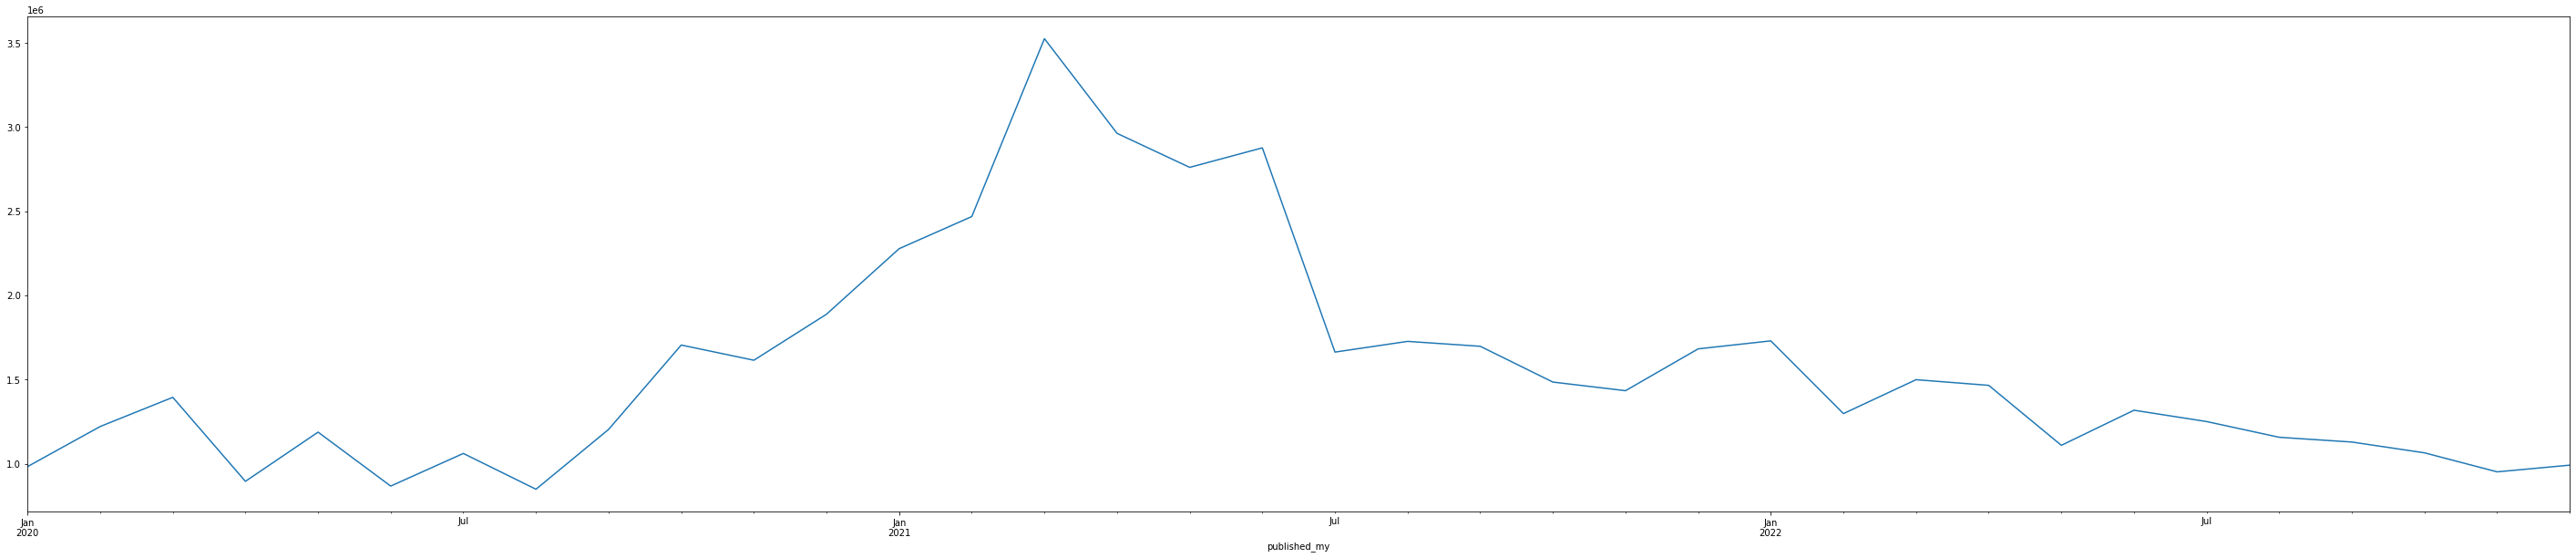

In [241]:
h3['published_my'] = h3['published_datetime'].dt.to_period('M')
h3.groupby(['published_my'])['view_count'].mean().plot(kind='line',figsize=(50,10))

### Average views by week month year

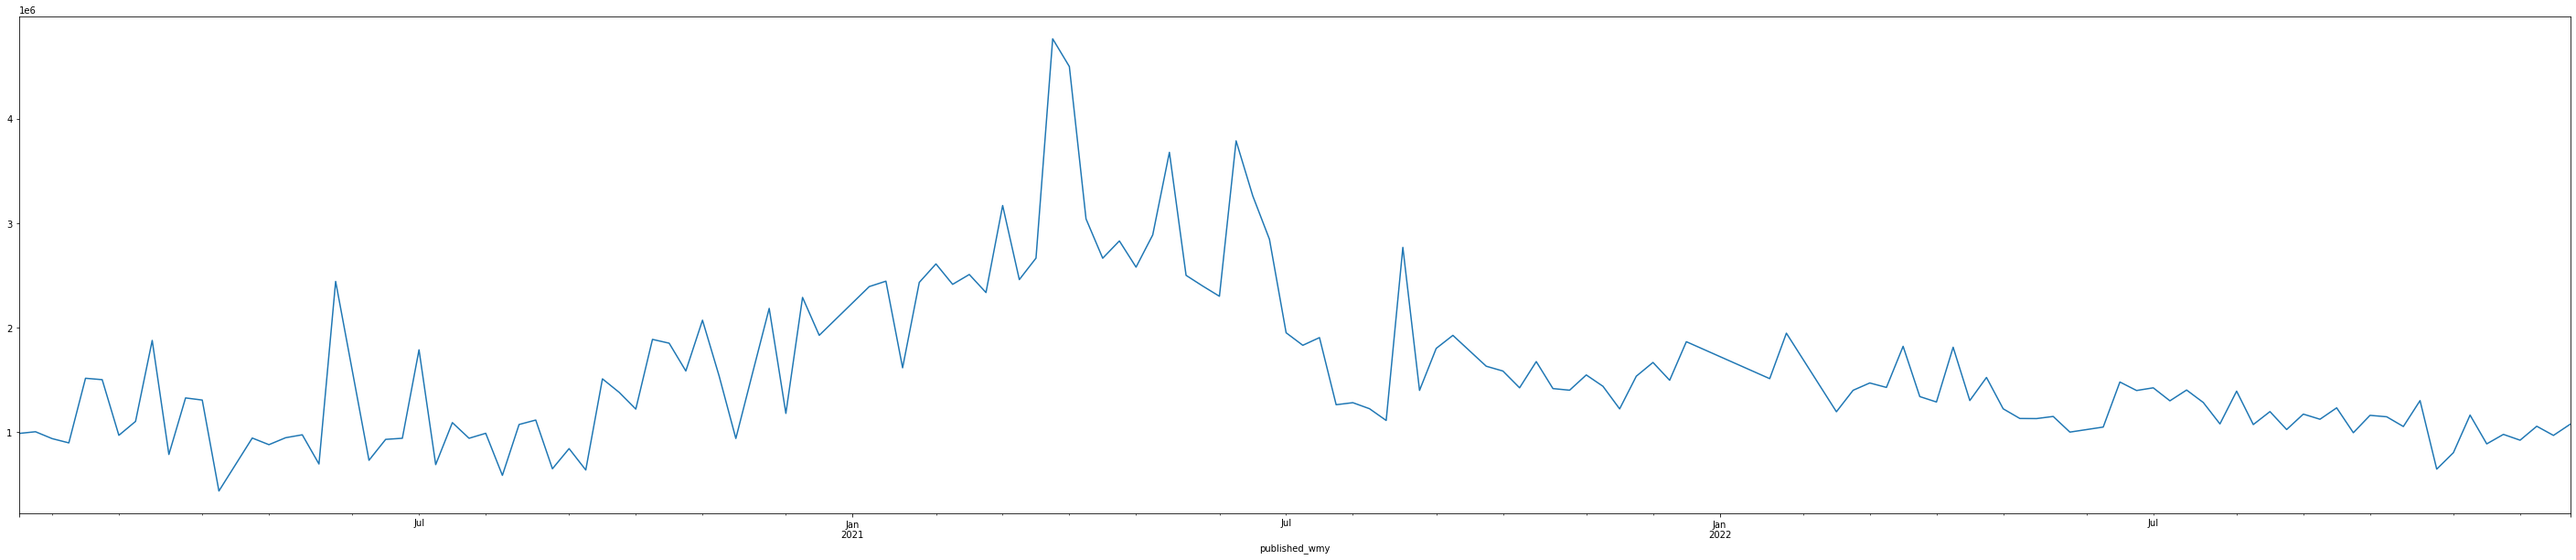

In [259]:
h3['published_wmy'] = h3['published_datetime'].dt.to_period('W')
h3.groupby(['published_wmy'])['view_count'].mean().plot(kind='line',figsize=(50,10))

### Average duration by week month year

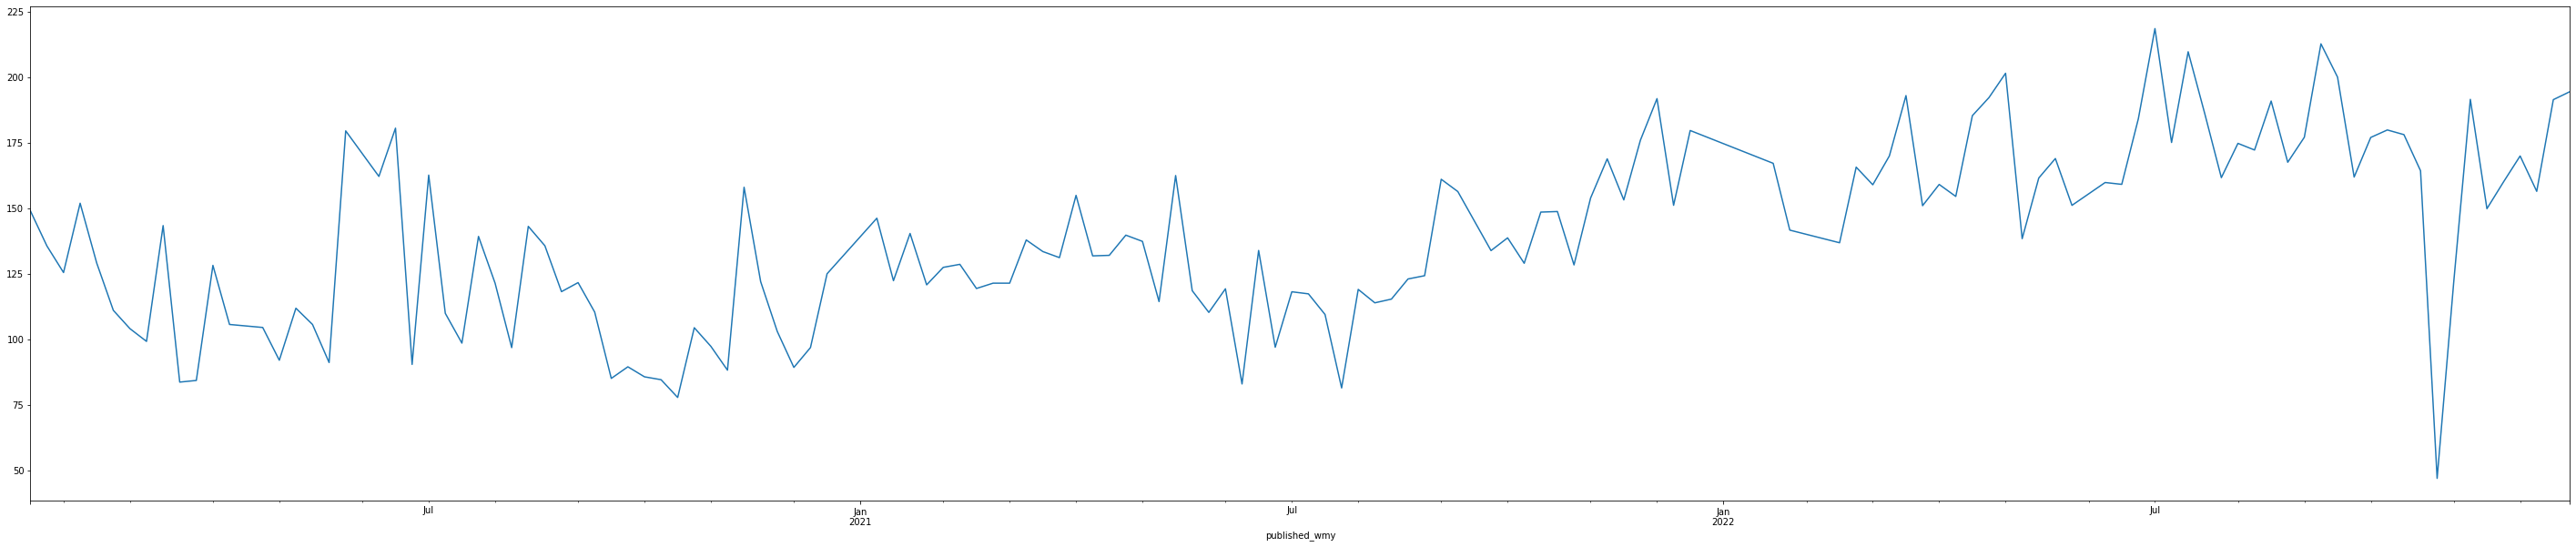

In [260]:
h3['duration_s'] = h3['duration'].dt.total_seconds()/60
h3.groupby(['published_wmy'])['duration_s'].mean().plot(kind='line',figsize=(50,10))

Note: 
- Average duration is particularly low on the week of 2022-10-24/2022-10-30 because there was a channel ban (only the short halloween special)

# Which series is the most popular?

In [257]:
# isolate series
h3['series'] = np.where(h3.name.str.contains('After Dark|Afterdark'),'After Dark',
                        np.where(h3.name.str.contains('H3TV'),'H3TV',
                                 np.where(h3.name.str.contains('H3 Podcast'),'H3 Podcast',
                                          np.where(h3.name.str.contains('Off The Rails|OTR'),'Off The Rails',
                                                   np.where(h3.name.str.contains('Content Court'),'Content Court',
                                                            np.where(h3.name.str.contains('Leftovers'),'Leftovers',
                                                                     np.where(h3.name.str.contains('Frenemies'),'Frenemies',
                                                                              np.where(h3.name.str.contains('Families'),'Families',
                                                                                       'Other'))))))))
# fix miscategorised videos
h3.at[7,'series']='Off The Rails'
h3.at[40,'series']='After Dark'
h3.at[95,'series']='Off The Rails'
h3.at[126,'series']='Off The Rails'
h3.at[228,'series']='Families'

In [245]:
len(h3[h3['series']=='H3 Podcast'])

92

### Total views percentage breakdown by series
Despite having fewer episodes, Frenemies achieved more total views than After Dark, Off the Rails, and H3 Podcast.

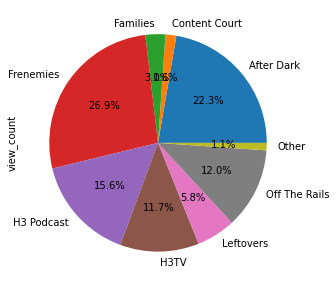

In [246]:
h3.groupby(['series'])['view_count'].sum().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))

### Average views by series
Frenemies, After Dark, and Families all average over 1.5 in views.

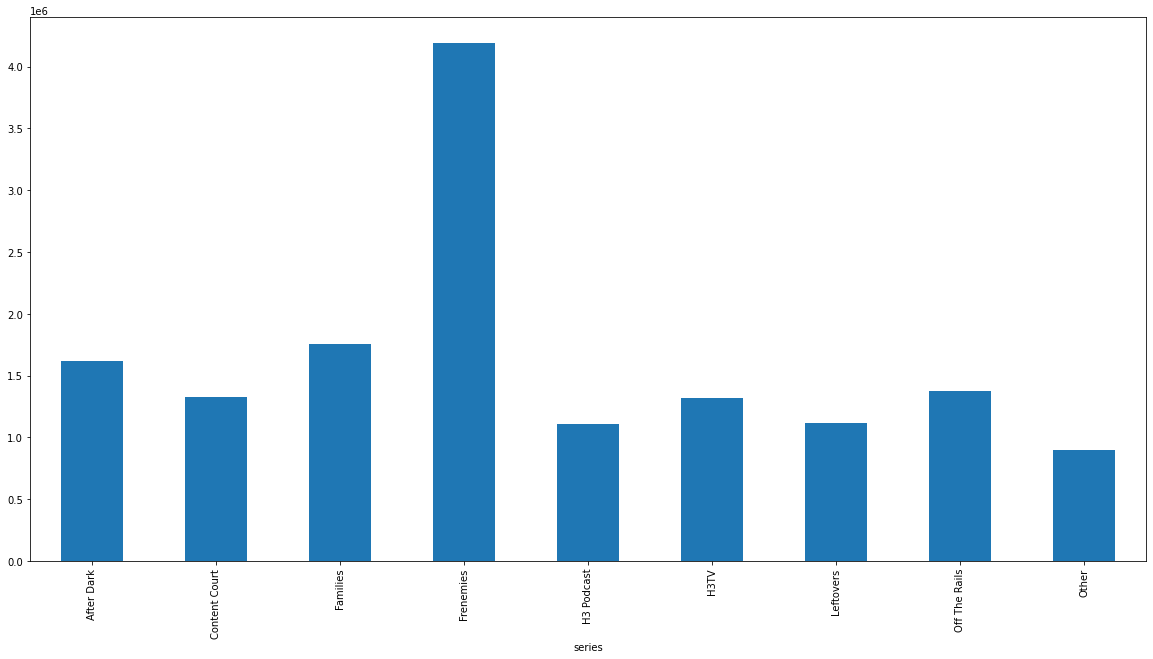

In [247]:
h3.groupby(['series'])['view_count'].mean().plot(kind='bar',figsize=(20,10))

### Total views distribution by series
Frenemies and After Dark have the largest spread in views while Leftovers has the smallest.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


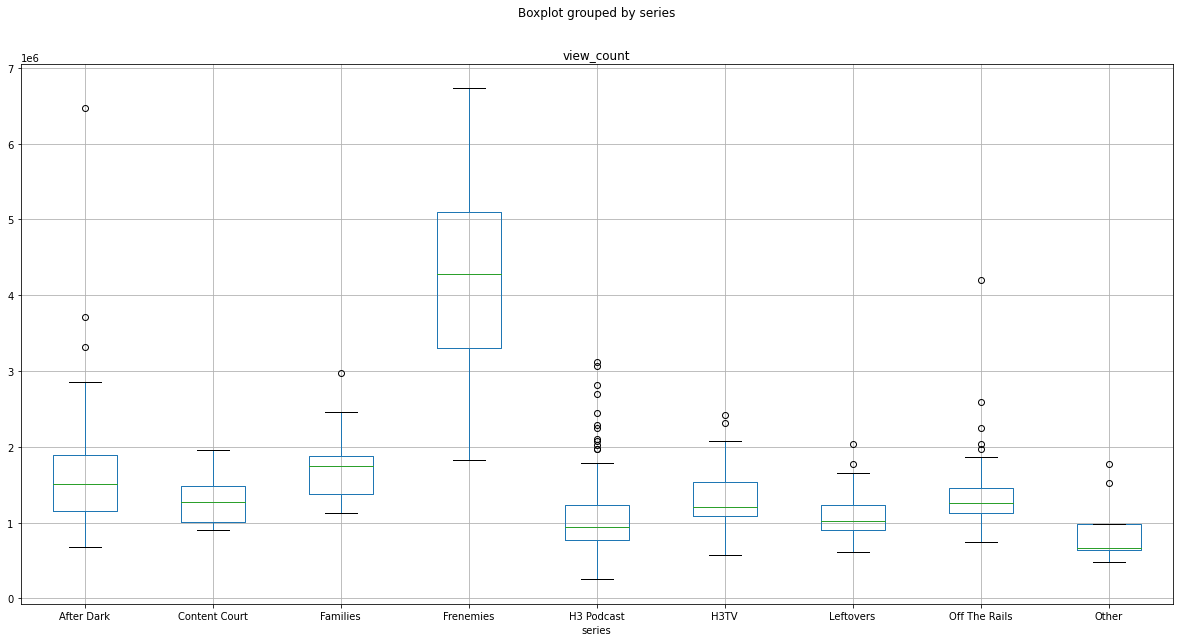

In [202]:
h3.boxplot(column='view_count',by='series',figsize=(20,10))

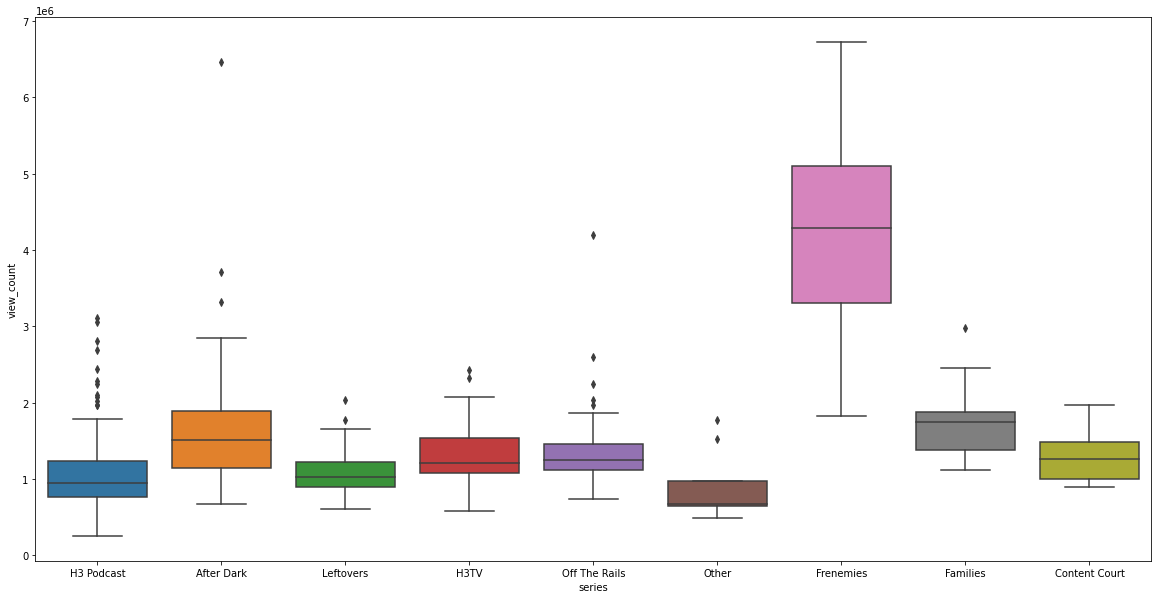

In [210]:
plt.figure(figsize=(20,10))
sns.boxplot(data=h3,x='series',y='view_count')

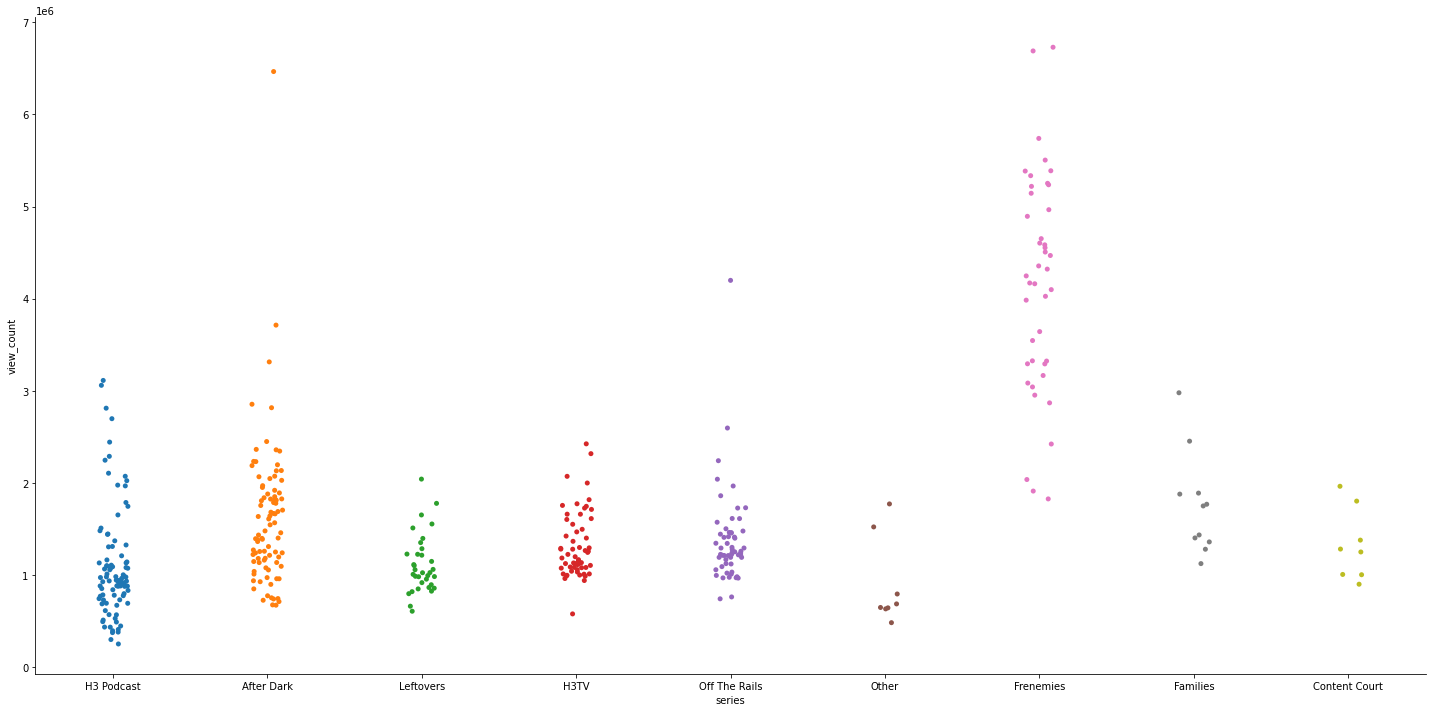

In [218]:
sns.catplot(data=h3,x='series',y='view_count',height=10,aspect=2)

# Show Overview

In [164]:
h3['view_count'].mean()

1634259.4425

In [297]:
h3[h3['series']!='Frenemies'].nlargest(10,'view_count')

,id,published_datetime,name,description,duration,view_count,like_count,comment_count,series,duration_s,published_wmy
263,JIPKIuOZm9A,2021-04-02 23:31:09,James Charles’ Apology (aka Confession) - H3 A...,NEW H3 MERCH! http://h3h3shop.com\nTEDDY FRESH...,0 days 03:56:25,6464314,74303,8677,After Dark,236.416667,2021-03-29/2021-04-04
206,jFG57UkVvx8,2021-08-19 23:41:23,I'm Done With Trisha Paytas - Off The Rails #8,Thank you to http://curology.com/H3 & http://k...,0 days 01:50:11,4198627,154516,30717,Off The Rails,110.183333,2021-08-16/2021-08-22
230,8aCfvBnOcnU,2021-06-18 22:31:59,The Real Reason Frenemies Broke Up - H3 After ...,Thank you to http://Kraken.com/H3AD & http://P...,0 days 02:33:25,3713172,115149,14756,After Dark,153.416667,2021-06-14/2021-06-20
297,QBmlIdXpGeU,2021-01-15 23:47:18,"Trisha Paytas, Jeffree Star, Hair By Jay, D'An...",Thank you to http://Keeps.com/h3 & http://Upst...,0 days 03:11:26,3313961,48520,7106,After Dark,191.433333,2021-01-11/2021-01-17
229,Fvg5RTrFLfI,2021-06-22 01:04:17,Ethan Klein Debates Steven Crowder (Ft. Sam Se...,Thank you to Steven Crowder for coming on the ...,0 days 00:41:27,3112784,169414,140706,H3 Podcast,41.450000,2021-06-21/2021-06-27
118,ppyW70czRqU,2022-04-08 22:34:23,Brittany Broski - H3 Podcast #249,Thank you to http://mintmobile.com/afterdark &...,0 days 02:36:36,3059909,83606,7996,H3 Podcast,156.600000,2022-04-04/2022-04-10
228,3CEMfve0fb8,2021-06-23 20:18:00,The New Host Of Frenemies Is…,Become a member for access to the episodes a d...,0 days 01:34:37,2978850,172774,27151,Families,94.616667,2021-06-21/2021-06-27
246,4CP_nl037_c,2021-05-13 22:59:40,James Charles Is Being Sued & Bill Gates Calls...,Thank you to http://MeUndies.com/H3 for sponso...,0 days 03:20:45,2854549,43938,6068,After Dark,200.750000,2021-05-10/2021-05-16
232,uvc-dX0fG3s,2021-06-11 22:37:20,And The Number Of Babies Is... - H3 After Dark...,Thank you to http://ShadyRays.com (use code: H...,0 days 02:47:04,2816735,76490,9275,After Dark,167.066667,2021-06-07/2021-06-13
231,2jFIQr_cVz4,2021-06-17 20:47:00,Bella Poarch - H3 Podcast # 247,Thank you to http://Canva.me/H3 & http://MeUnd...,0 days 01:54:24,2811769,141874,15819,H3 Podcast,114.400000,2021-06-14/2021-06-20


# Correlation between Longer Titles and Views

In [301]:
h3['title'] = h3['name'].str.rsplit('-',1,expand=True)[0]
h3['title_len'] = h3['title'].str.len()

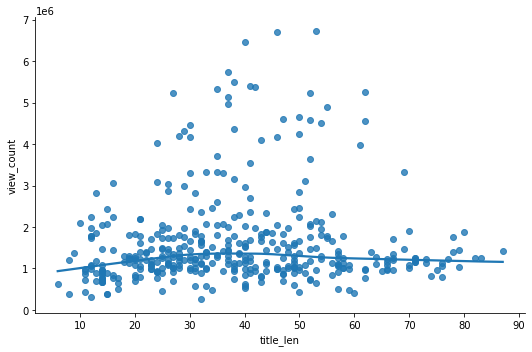

In [309]:
sns.lmplot(data=h3,
           x='title_len',
           y='view_count',
           lowess=True,
           height=5,aspect=1.5)

# Correlation between duration and views

In [270]:
h3['duration_s'].corr(h3['view_count'])

-0.07003087607428808

<Figure size 3600x720 with 0 Axes>

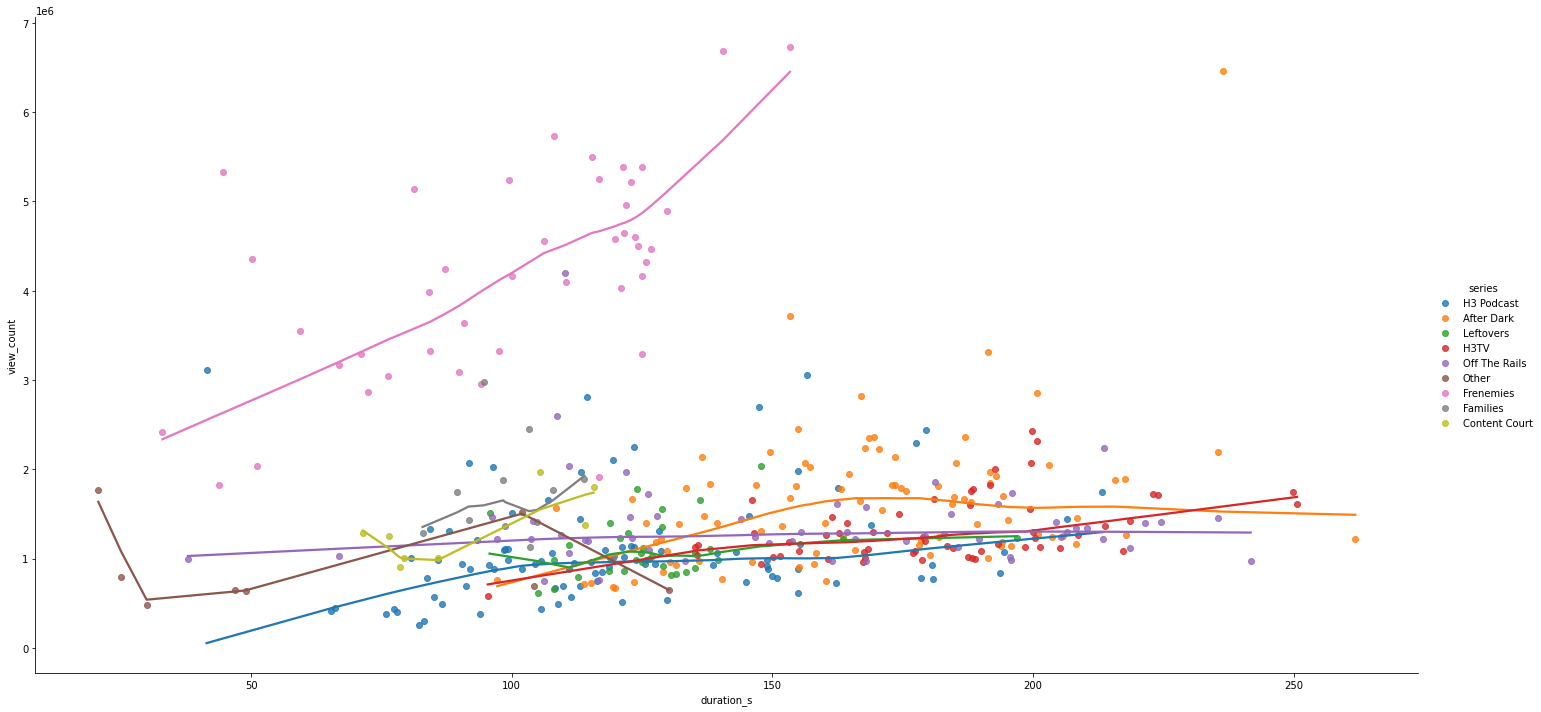

In [285]:
plt.figure(figsize=(50,10))
sns.lmplot(data=h3,
           x='duration_s',y='view_count',
           hue='series',
           lowess=True,
           height=10,aspect=2)

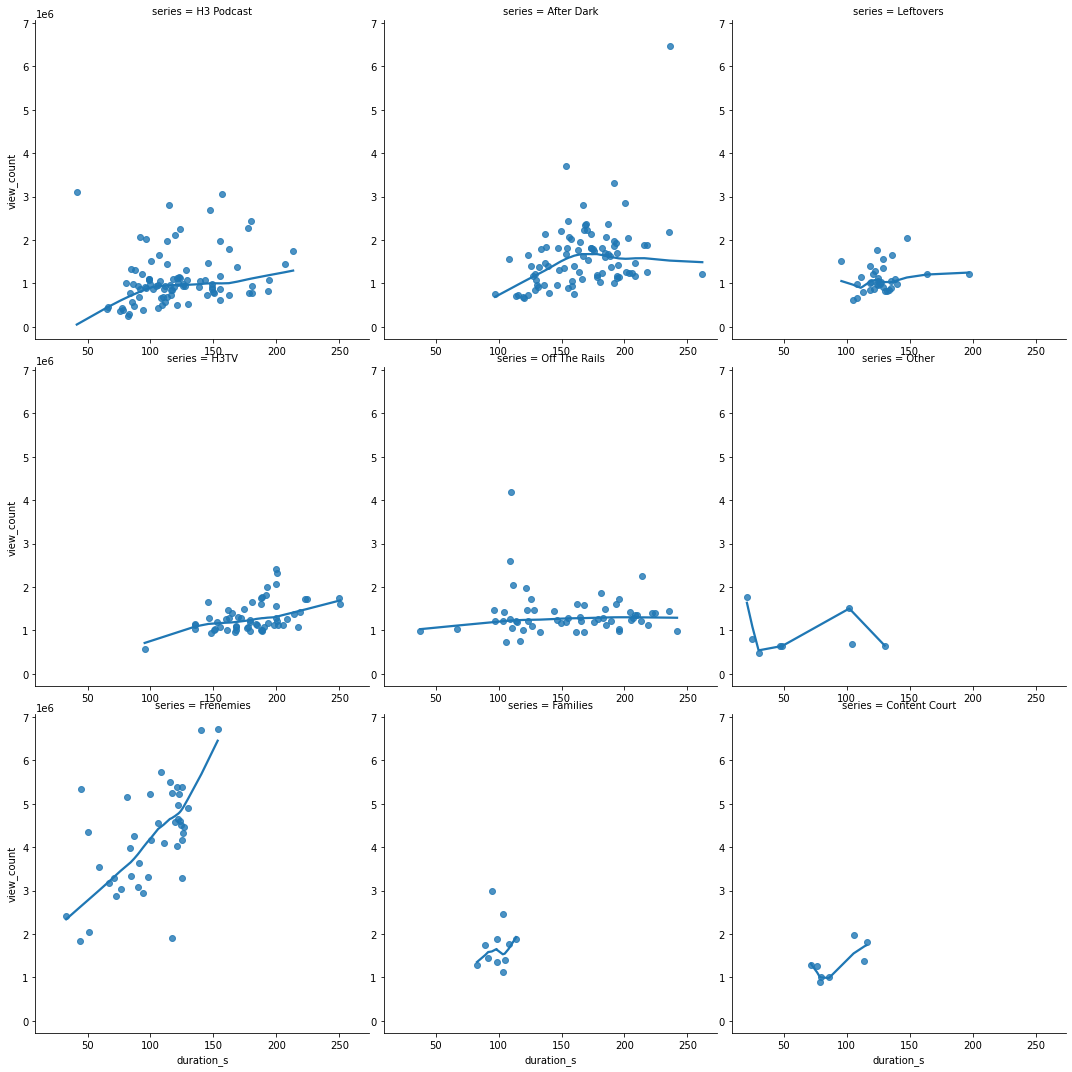

In [293]:
g = sns.lmplot(data=h3,
               x='duration_s',y='view_count',
               col='series',col_wrap=3,
               lowess=True)
    
for axis in g.axes.flat:
  axis.tick_params(labelbottom=True,labelleft=True)

plt.show()